In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re

In [2]:
bikes=pd.read_csv('Bike_Sales.csv')
bikes.head(7)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695.0,12/1/2021,1.0,December,2021.0,39.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
1,261696.0,12/1/2021,1.0,December,2021.0,44.0,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
2,261697.0,12/2/2021,2.0,December,2021.0,37.0,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,$420.00,$769.00,$698.00,$840.00,"$1,538.00"
3,261698.0,12/2/2021,2.0,December,2021.0,31.0,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,$420.00,$769.00,$349.00,$420.00,$769.00
4,261699.0,12/3/2021,3.0,December,2021.0,37.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,"$1,252.00","$2,295.00","$2,086.00","$2,504.00","$4,590.00"
5,261700.0,12/3/2021,3.0,December,2021.0,24.0,Youth (<25),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1.0,"$1,252.00","$2,295.00","$1,043.00","$1,252.00","$2,295.00"
6,261701.0,12/3/2021,3.0,December,2021.0,37.0,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,"$1,252.00","$2,295.00","$1,043.00","$1,252.00","$2,295.00"


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_Order #        88 non-null     float64
 1   Date                 88 non-null     object 
 2   Day                  88 non-null     float64
 3   Month                88 non-null     object 
 4   Year                 88 non-null     float64
 5   Customer_Age         88 non-null     float64
 6   Age_Group            88 non-null     object 
 7   Customer_Gender      88 non-null     object 
 8   Country              88 non-null     object 
 9   State                88 non-null     object 
 10  Product_Category     88 non-null     object 
 11  Sub_Category         88 non-null     object 
 12  Product_Description  88 non-null     object 
 13  Order_Quantity       88 non-null     float64
 14   Unit_Cost           88 non-null     object 
 15   Unit_Price          88 non-null     objec

In [4]:
bikes.shape

(89, 19)

In [5]:
bikes.dtypes

Sales_Order #          float64
Date                    object
Day                    float64
Month                   object
Year                   float64
Customer_Age           float64
Age_Group               object
Customer_Gender         object
Country                 object
State                   object
Product_Category        object
Sub_Category            object
Product_Description     object
Order_Quantity         float64
 Unit_Cost              object
 Unit_Price             object
 Profit                 object
 Cost                   object
Revenue                 object
dtype: object

In [6]:
# Convert categorical variables to category types (factor equivalent)
bikes['Month'] = bikes['Month'].astype('category')
bikes['Age_Group'] = bikes['Age_Group'].astype('category')
bikes['Customer_Gender'] = bikes['Customer_Gender'].astype('category')
bikes['Country'] = bikes['Country'].astype('category')
bikes['State'] = bikes['State'].astype('category')
bikes['Product_Category'] = bikes['Product_Category'].astype('category')
bikes['Sub_Category'] = bikes['Sub_Category'].astype('category')
# Convert Date column to datetime
bikes['Date'] = pd.to_datetime(bikes['Date'])

In [7]:
bikes['Product_Description'] = bikes['Product_Description'].astype('category')


In [8]:
bikes['Revenue']=bikes['Revenue'].replace("[,$]", "", regex=True).astype(float)
bikes[' Unit_Cost ']=bikes[' Unit_Cost '].replace("[,$]", "", regex=True).astype(float)
bikes[' Unit_Price ']=bikes[' Unit_Price '].replace("[,$]", "", regex=True).astype(float)
bikes[' Cost ']=bikes[' Cost '].replace("[,$]", "", regex=True).astype(float)
bikes[' Profit ']=bikes[' Profit '].replace("[,$]", "", regex=True).astype(float)


In [9]:
bikes.dtypes

Sales_Order #                 float64
Date                   datetime64[ns]
Day                           float64
Month                        category
Year                          float64
Customer_Age                  float64
Age_Group                    category
Customer_Gender              category
Country                      category
State                        category
Product_Category             category
Sub_Category                 category
Product_Description          category
Order_Quantity                float64
 Unit_Cost                    float64
 Unit_Price                   float64
 Profit                       float64
 Cost                         float64
Revenue                       float64
dtype: object

In [10]:
bikes.head(5)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695.0,2021-12-01,1.0,December,2021.0,39.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252.0,2295.0,4172.0,5008.0,9180.0
1,261696.0,2021-12-01,1.0,December,2021.0,44.0,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266.0,2320.0,1054.0,1266.0,2320.0
2,261697.0,2021-12-02,2.0,December,2021.0,37.0,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420.0,769.0,698.0,840.0,1538.0
3,261698.0,2021-12-02,2.0,December,2021.0,31.0,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420.0,769.0,349.0,420.0,769.0
4,261699.0,2021-12-03,3.0,December,2021.0,37.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,1252.0,2295.0,2086.0,2504.0,4590.0


In [11]:
bikes.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

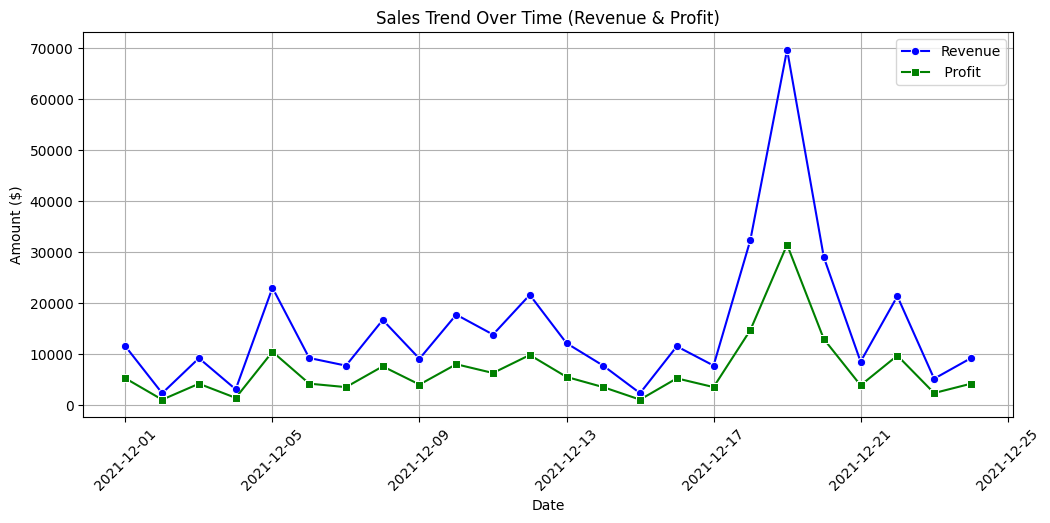

In [12]:
#sales trend overtime
#group by date
sales_trend=bikes.groupby('Date')[['Revenue',' Profit ']].sum()
#plot
plt.figure(figsize=(12,5))
sns.lineplot(x=sales_trend.index, y=sales_trend["Revenue"], label="Revenue", color="blue", marker="o")
sns.lineplot(x=sales_trend.index, y=sales_trend[" Profit "], label=" Profit ", color="green", marker="s")
# Formatting
plt.title("Sales Trend Over Time (Revenue & Profit)")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

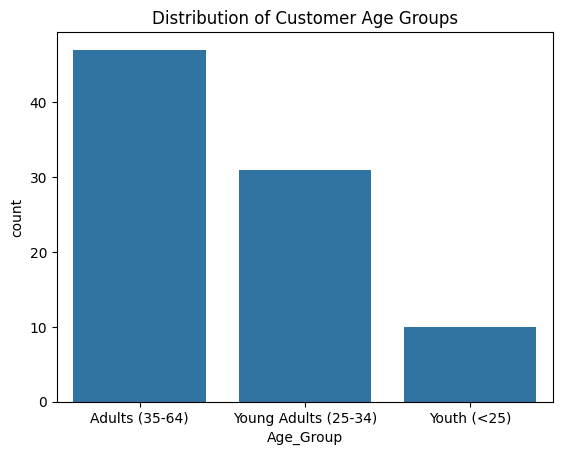

In [13]:
# Barplot for categorical variables like 'Age_Group'
sns.countplot(x='Age_Group', data=bikes)
plt.title("Distribution of Customer Age Groups")
plt.show()

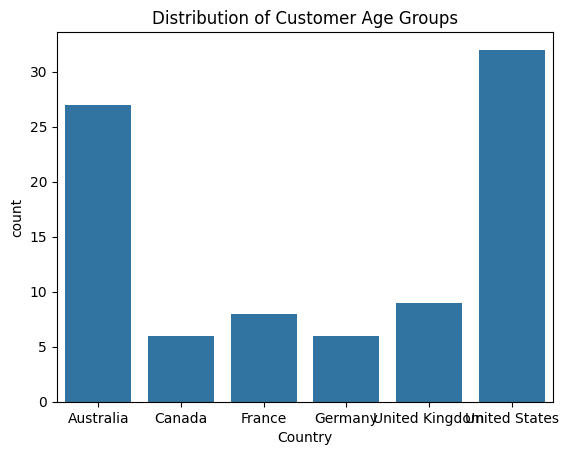

In [14]:
# Barplot for categorical variables like 'Age_Group'
sns.countplot(x='Country', data=bikes)
plt.title("Distribution of Customer Age Groups")
plt.show()

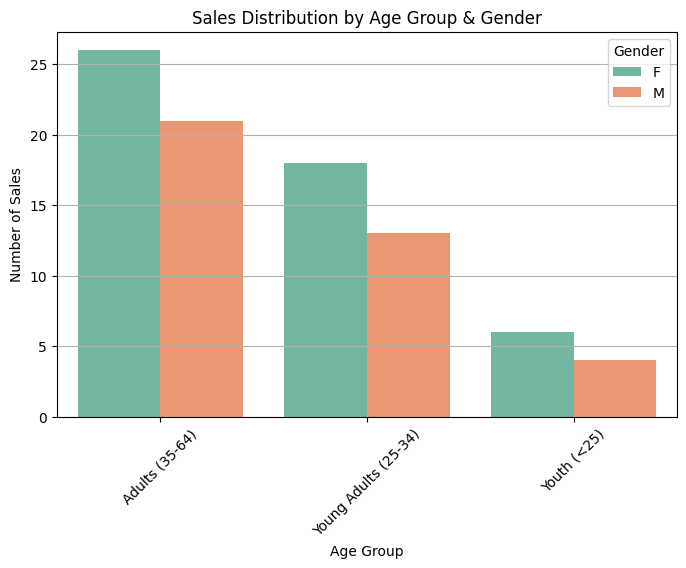

In [15]:
# Count sales per age group
plt.figure(figsize=(8, 5))
sns.countplot(data=bikes, x="Age_Group", hue="Customer_Gender", palette="Set2")
plt.title("Sales Distribution by Age Group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis='y')
plt.show()


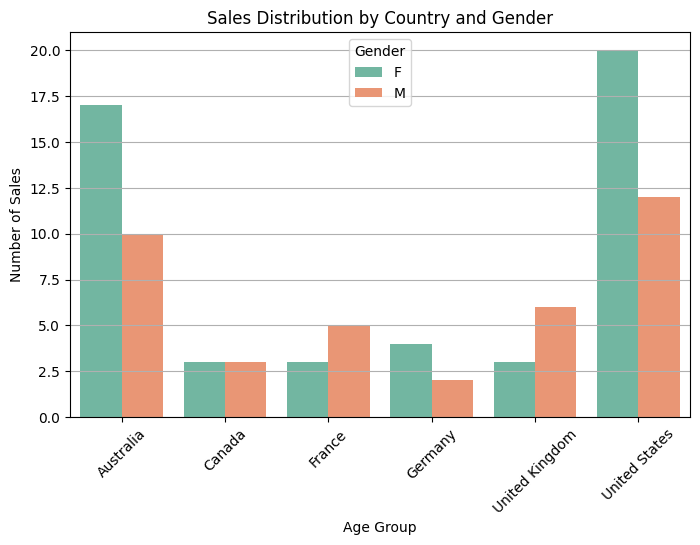

In [16]:
# Count sales per country
plt.figure(figsize=(8, 5))
sns.countplot(data=bikes, x="Country", hue="Customer_Gender", palette="Set2")
plt.title("Sales Distribution by Country and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis='y')
plt.show()


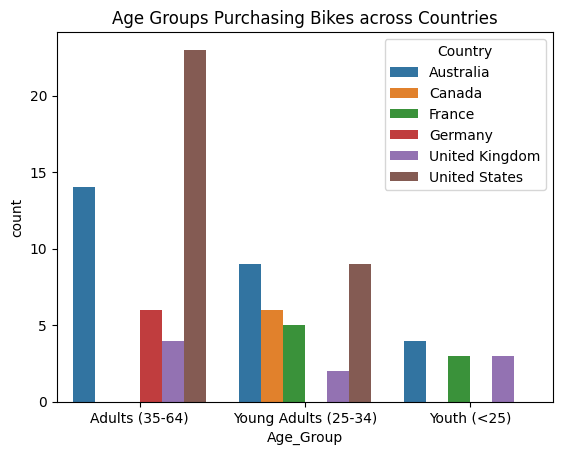

In [17]:
## 3. Relationships between categorical variables (Count graph)
sns.countplot(bikes, x='Age_Group', hue='Country')
plt.title("Age Groups Purchasing Bikes across Countries")
plt.show()

In [18]:
#Geographical sales analysis
import plotly.express as px
import plotly.io as pio

bikes['Revenue'] = pd.to_numeric(bikes['Revenue'], errors='coerce')

# Group by 'Country' and sum the revenue
country_sales = bikes.groupby('Country')['Revenue'].sum().reset_index()

# Create a bar plot for Revenue per country
fig = px.bar(country_sales, x='Country', y='Revenue', 
             title='Revenue per Country',
             labels={'Revenue': 'Total Sales (USD)', 'Country': 'Country'},
             color='Revenue', color_continuous_scale='Viridis')

# Show the plot
#fig.show()
pio.show(fig)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24140\1089433707.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = bikes.groupby('Country')['Revenue'].sum().reset_index()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
bikes.dtypes

Sales_Order #                 float64
Date                   datetime64[ns]
Day                           float64
Month                        category
Year                          float64
Customer_Age                  float64
Age_Group                    category
Customer_Gender              category
Country                      category
State                        category
Product_Category             category
Sub_Category                 category
Product_Description          category
Order_Quantity                float64
 Unit_Cost                    float64
 Unit_Price                   float64
 Profit                       float64
 Cost                         float64
Revenue                       float64
Cost                          float64
dtype: object

In [19]:
bikes.head(10)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695.0,2021-12-01,1.0,December,2021.0,39.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252.0,2295.0,4172.0,5008.0,9180.0
1,261696.0,2021-12-01,1.0,December,2021.0,44.0,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266.0,2320.0,1054.0,1266.0,2320.0
2,261697.0,2021-12-02,2.0,December,2021.0,37.0,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420.0,769.0,698.0,840.0,1538.0
3,261698.0,2021-12-02,2.0,December,2021.0,31.0,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420.0,769.0,349.0,420.0,769.0
4,261699.0,2021-12-03,3.0,December,2021.0,37.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,1252.0,2295.0,2086.0,2504.0,4590.0
5,261700.0,2021-12-03,3.0,December,2021.0,24.0,Youth (<25),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1.0,1252.0,2295.0,1043.0,1252.0,2295.0
6,261701.0,2021-12-03,3.0,December,2021.0,37.0,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,1252.0,2295.0,1043.0,1252.0,2295.0
7,261702.0,2021-12-04,4.0,December,2021.0,31.0,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",4.0,420.0,769.0,1396.0,1680.0,3076.0
8,261703.0,2021-12-05,5.0,December,2021.0,39.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252.0,2295.0,4172.0,5008.0,9180.0
9,261704.0,2021-12-05,5.0,December,2021.0,42.0,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4.0,1252.0,2295.0,4172.0,5008.0,9180.0


In [20]:
color_palette=r'\b(black|silver)\b'
bikes['color']=bikes['Product_Description'].str.extract(color_palette,flags=re.IGNORECASE,expand=False)


In [21]:
sales_of_color=bikes.groupby('color')['Revenue'].sum().reset_index

In [ ]:
sales_of_color=sales_of_color.sort_values(by='Revenue',ascending=False)

AttributeError: 'function' object has no attribute 'sort_values'